In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime

D:\conda\envs\py36\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


### 载入数据

In [2]:
amazon_data = pdr.get_data_yahoo('AMZN')
amazon_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-10,532.280029,523.000000,528.520020,524.000000,2615900,524.000000
2015-08-11,528.979980,522.000000,523.650024,527.460022,2676600,527.460022
2015-08-12,527.500000,513.059998,523.750000,525.909973,3962300,525.909973
2015-08-13,534.659973,525.489990,527.369995,529.659973,2895200,529.659973
2015-08-14,534.109985,528.250000,528.250000,531.520020,1994800,531.520020


### 数据预处理与特征工程

In [7]:
df = amazon_data['Open'].values
df = df.reshape(-1,1)
df.shape

(1259, 1)

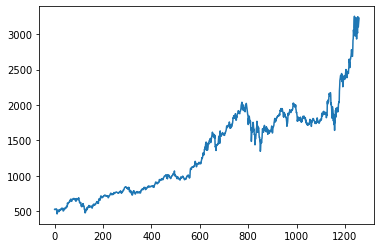

In [8]:
plt.plot(df)
plt.show()

In [9]:
#提取用于训练数据以及测试数据
data_train = np.array(df[:int(df.shape[0]*0.8)])
data_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(data_train.shape)
print(data_test.shape)

(1007, 1)
(302, 1)


In [11]:
#特征的标准化
scaler = MinMaxScaler(feature_range=(0,1))
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

In [12]:
#将训练集与测试集中的特征与标签提取出来
def create_dataset(df):
    x=[]
    y=[]
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x, y
x_train, y_train = create_dataset(data_train)
x_test, y_test = create_dataset(data_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(957, 50)
(957,)
(252, 50)
(252,)


In [13]:
#改变数据的形状,便于序列模型的训练
#将包含50个数据的数组，转化为50个数组，每个数组只包含一个数。
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)

(957, 50, 1)
(252, 50, 1)


### 建立模型

In [14]:
model = Sequential()

model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

### 模型训练

In [15]:
model.fit(x_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
957/957 [==============================] - 11s 12ms/step - loss: 0.0364
Epoch 2/50
957/957 [==============================] - 7s 7ms/step - loss: 0.0051
Epoch 3/50
957/957 [==============================] - 7s 7ms/step - loss: 0.0041
Epoch 4/50
957/957 [==============================] - 8s 8ms/step - loss: 0.0042
Epoch 5/50
957/957 [==============================] - 7s 7ms/step - loss: 0.0038
Epoch 6/50
957/957 [==============================] - 6s 7ms/step - loss: 0.0040
Epoch 7/50
957/957 [==============================] - 6s 7ms/step - loss: 0.0041
Epoch 8/50
957/957 [==============================] - 7s 7ms/step - loss: 0.0034
Epoch 9/50
957/957 [==============================] - 7s 7ms/step - loss: 0.0035
Epoch 10/50
957/957 [==============================] - 6s 6ms/step - loss: 0.0030
Epoch 11/50
957/957 [==============================] - 6s 7ms/step - loss: 0.0030
Epoch 12/50
957/957 [==============================] - 6s 6ms/step - loss: 0.0034
Epoch 13/50
957/957 [==

### 模型评估

In [19]:
pre = model.predict(x_test)
pre = scaler.inverse_transform(pre)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

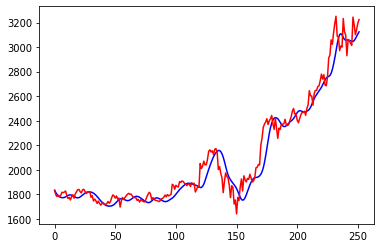

In [24]:
plt.plot(pre,'b')
plt.plot(y_test,'r')
plt.show()